# Linear Regression Classification

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Activation,Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.datasets import load_breast_cancer

## Load the data set

In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, 
                  index=None, 
                  columns=data.feature_names, 
                  dtype=None, 
                  copy=False)

In [3]:
# Another way to load the data as df
#df = load_breast_cancer(as_frame=True)
#df.frame

## Pre-Process the data

### Get the train test split

In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

### Normalize the data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(426, 30)

## Select the Problem Type : 
### ANN - Multi-Class Classification

### Model : Example 1

#### Set Hyper Parameters

#### Create

In [7]:
# Example One: Choosing too many epochs and overfitting!
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# Build the model using the functional API
k = 1
i = Input(shape=X_train[0].shape)
x = Dense(units = 30, activation='relu')(i)
x = Dense(units=15,activation='relu')(x)
x = Dense(k, activation='sigmoid')(x)

model = Model(i, x)

#### Compile

In [8]:
# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Model Summary

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [10]:
history = model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=0
          )

#### Evaluate

<AxesSubplot:>

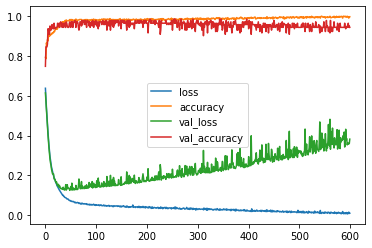

In [11]:
# todo fix this
pd.DataFrame(model.history.history).plot()

### Model : Example 2

#### create
#### compile
#### summary

In [12]:
## Example Two: Early Stopping
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

# Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

#model.summary()    #raises an error if input is not provided in the first layer ;)
model.compile(optimizer='adam',
              loss='binary_crossentropy')

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x = X_train, 
          y = y_train, 
          epochs = 600,
          validation_data = (X_test, y_test), verbose=1, callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6953 - val_loss: 0.6703
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6545 - val_loss: 0.6368
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6163 - val_loss: 0.5986
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5757 - val_loss: 0.5570
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5359 - val_loss: 0.5144
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4909 - val_loss: 0.4704
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4425 - val_loss: 0.4184
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3964 - val_loss: 0.3694
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3521 - val_loss: 0.3288
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3171 - val_loss: 0.2935
Epoch 11

<AxesSubplot:>

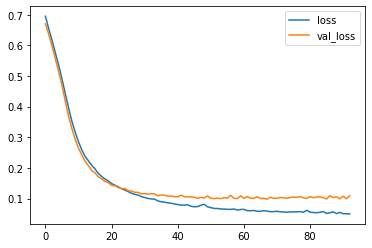

In [14]:
pd.DataFrame(model.history.history).plot()

### Model : Example 3

#### Hyper parameters


#### create
#### compile
#### summary


In [15]:
## Example Three: Adding in DropOut Layers
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
#model.summary()    #raises an error if input is not provided in the first layer ;)

In [16]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.7278 - val_loss: 0.7115
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7139 - val_loss: 0.6911
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6926 - val_loss: 0.6754
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6703 - val_loss: 0.6598
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6446 - val_loss: 0.6425
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6399 - val_loss: 0.6223
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5999
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5789 - val_loss: 0.5710
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5712 - val_loss: 0.5402
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5842 - val_loss: 0.5180
Epoch 11

#### Evaluate

<AxesSubplot:>

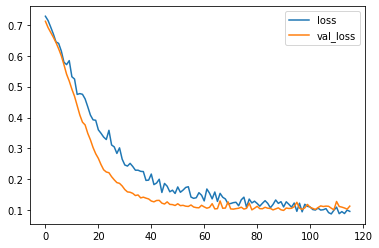

In [17]:
pd.DataFrame(model.history.history).plot()

### Model Evaluation

#### Predictions

In [18]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


#### Classsification report and confusion matrix

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions)) # https://en.wikipedia.org/wiki/Precision_and_recall
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]
